In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
brands = pd.read_csv('brands.csv')
users = pd.read_csv('users.csv')
receipts = pd.read_csv('receipts.csv')
receipts_items = pd.read_csv('receipt_items.csv')

In [3]:
brands.head(2)

,ID,BARCODE,BRAND_CODE,CPG_ID,CATEGORY,CATEGORY_CODE,NAME,ROMANCE_TEXT,RELATED_BRAND_IDS
0,5a8c35dde4b0ccf165fac9e6,511111904175,PEPPERIDGE FARM,5a734034e4b0d58f376be874,Grocery,GROCERY,Pepperidge Farm,Pepperidge Farm has been making exceptional co...,NaN
1,6234af8f4e09b6067c237adb,511111212997,CHEX MIX,6233966e8942a67af4934aa1,Snacks,SNACKS,CHEX MIX,NaN,NaN


In [4]:
users.head(2)

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538
1,2021-10-21T17:15:25.825Z,1987-08-08T05:00:00Z,prefer_not_to_say,2023-01-04T16:04:33Z,PA,unknown,Google,6171a02d8034995a3d858fb3


In [5]:
receipts.head(2)

,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,2022-05-19T18:57:57.228Z,2022-05-22T11:20:57.998Z,2022-05-19T18:42:57.042Z,NaN,2022-05-19T18:57:57.336Z,NaN,NaN,False,NaN,True
1,6096b7370a7216d316001149,NaN,NaN,NaN,2021-05-08T16:07:19.03Z,NaN,SUBMITTED,60047e8a2d7db612a69d2e18,True,NaN,...,NaN,2021-05-08T16:07:19.03Z,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


In [6]:
user_receipts = users.merge(receipts, left_on="ID", right_on="USER_ID", suffixes=('_user','_receipt'))

In [7]:
user_receipts.head(2)

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID_user,ID_receipt,STORE_NAME,...,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,6231035e0a722cf6a06cc5ef,CHAMPS SPORTS,...,2022-03-15T21:22:23.632Z,2022-03-15T21:22:28.859Z,NaN,NaN,2022-03-15T21:22:23.749Z,NaN,NaN,False,NaN,True
1,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538,62dc581a0a72218a1007361a,WALMART,...,2022-07-23T20:21:02.041Z,2022-07-23T20:21:05.981Z,NaN,NaN,NaN,2022-07-23T20:21:02.176Z,NaN,False,NaN,False


In [8]:
def plot_1(cat_var, n, plot_type):
    user_receipts[cat_var].value_counts()[:n].plot(kind=plot_type, figsize=(15,6), 
                                                         xlabel=cat_var, ylabel="Number of users", rot=45)

### ANALYSIS OF NO OF CUSTOMERS 

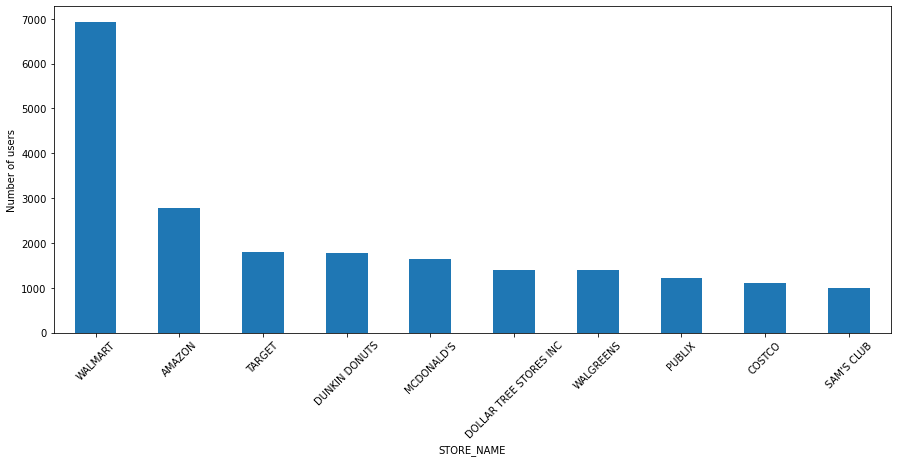

In [9]:
plot_1('STORE_NAME', 10, "bar")

 #### This is a high level analysis of the number of customers for the top 10 stores. We can see that walmart has seen the most number of customers when it comes to footfall. We can further analyze where the customer spending was the most

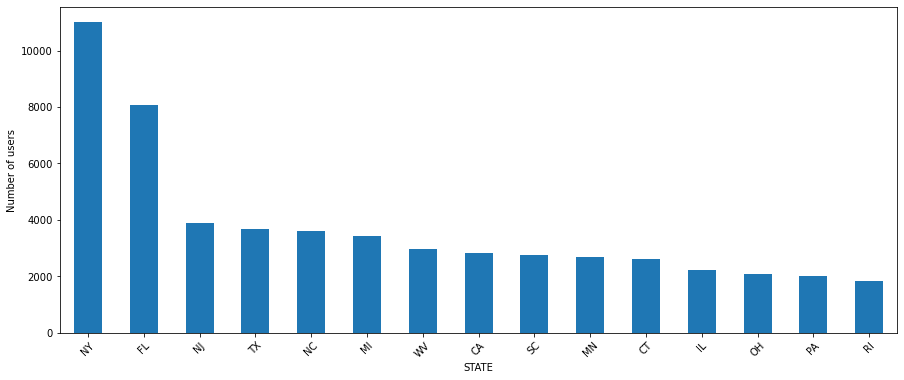

In [10]:
plot_1('STATE', 15, "bar")

 #### The state of New York has seen the most number of customers followed by Florida.

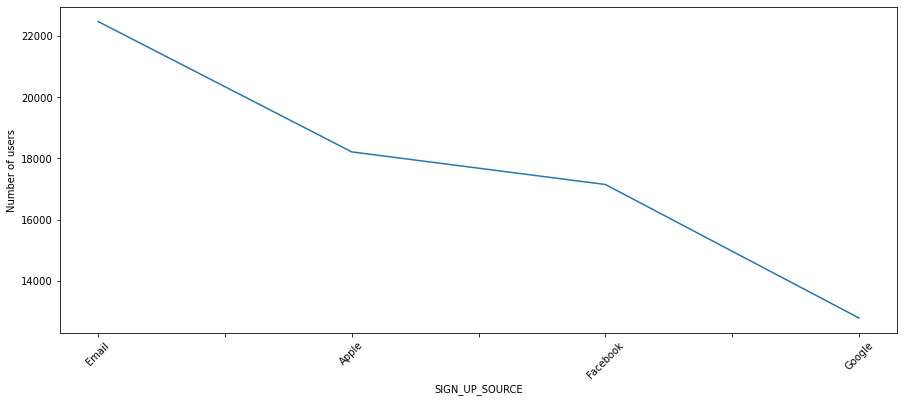

In [11]:
plot_1('SIGN_UP_SOURCE', 4,"line")

 #### Email signups are the most whereas google signups are the least. More than 22k people have signed up via Email, whereas less than 14k used Google signup. Signups via facebook and apple are somewhat similar

### ANALYSIS OF TOTAL SPENT

In [12]:
receipts_info = receipts.merge(receipts_items, left_on ="ID", right_on ="REWARDS_RECEIPT_ID")
receipts_info.head(2)

,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,...,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE_y
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,...,16c56fb28ecbec82e901331d68228f1f,abraxas LP,32032,NaN,1.0,859.87,NaN,NaN,CHCCK,2022-05-22T11:20:57.998Z
1,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,...,11c57ddd5747d37822c897a25f9e7768,Homeline Concentrated Regular Bleach,032251542848,HOMELINE,1.0,5.50,NaN,NaN,HL CONCENTRATED REGULAR BLEACH 121FL OZ,2022-04-27T20:17:55.521Z


In [13]:
storewise_spent = receipts_info.groupby(['STORE_NAME'])[['TOTAL_SPENT']].sum()
storewise_spent = storewise_spent.sort_values(by="TOTAL_SPENT", ascending=False)
storewise_spent.reset_index(inplace=True)

storewise_spent.head(2)

,STORE_NAME,TOTAL_SPENT
0,WALMART,8298204.72
1,COSTCO,2263483.97


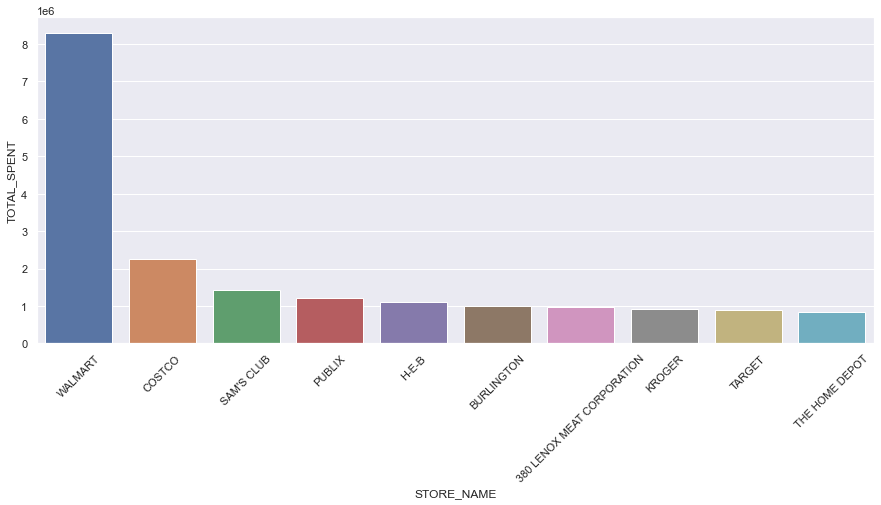

In [14]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(data=storewise_spent[:10], x="STORE_NAME", y="TOTAL_SPENT")
plt.xticks(rotation=45);

 #### In terms of total spent, we can see that Walmart beats any other store by a large margin.

### ANALYSIS OF TRENDS

In [15]:
trend_df = receipts_info[['PURCHASE_DATE', 'TOTAL_SPENT', 'STORE_NAME']]
trend_df.dropna(axis=0, inplace=True)

In [16]:
def trend_plot(store_name, year):
    trend_df = receipts_info[['PURCHASE_DATE', 'TOTAL_SPENT', 'STORE_NAME']]
    trend_df.dropna(axis=0, inplace=True)
    store_trend = trend_df[trend_df['STORE_NAME'].str.upper() == store_name]
    store_trend['split_purchase_date'] = store_trend['PURCHASE_DATE'].str.split('-')
    store_trend['YEAR'] = store_trend['split_purchase_date'].str[0]
    store_trend['MONTH'] = store_trend['split_purchase_date'].str[1]
    store_trend.drop(columns=['split_purchase_date'], inplace=True)
    yearmonth_trends = store_trend.groupby(['YEAR', 'MONTH'])[['TOTAL_SPENT']].sum().reset_index()
    yearmonth_trends = yearmonth_trends[yearmonth_trends['YEAR'] == year]
    return yearmonth_trends

In [17]:
# 2021
walmart_df_2021 = trend_plot('WALMART', '2021')
costco_df_2021 = trend_plot('COSTCO', '2021')
target_df_2021 =  trend_plot("TARGET", '2021')
homedepot_df_2021 = trend_plot("THE HOME DEPOT", '2021')
kroger_df_2021 = trend_plot("KROGER", '2021')
samsclub_df_2021 = trend_plot("SAM'S CLUB", '2021')

# 2022
walmart_df_2022 = trend_plot('WALMART', '2022')
costco_df_2022 = trend_plot('COSTCO', '2022')
target_df_2022 =  trend_plot("TARGET", '2022')
homedepot_df_2022 = trend_plot("THE HOME DEPOT", '2022')
kroger_df_2022 = trend_plot("KROGER", '2022')
samsclub_df_2022 = trend_plot("SAM'S CLUB", '2022')


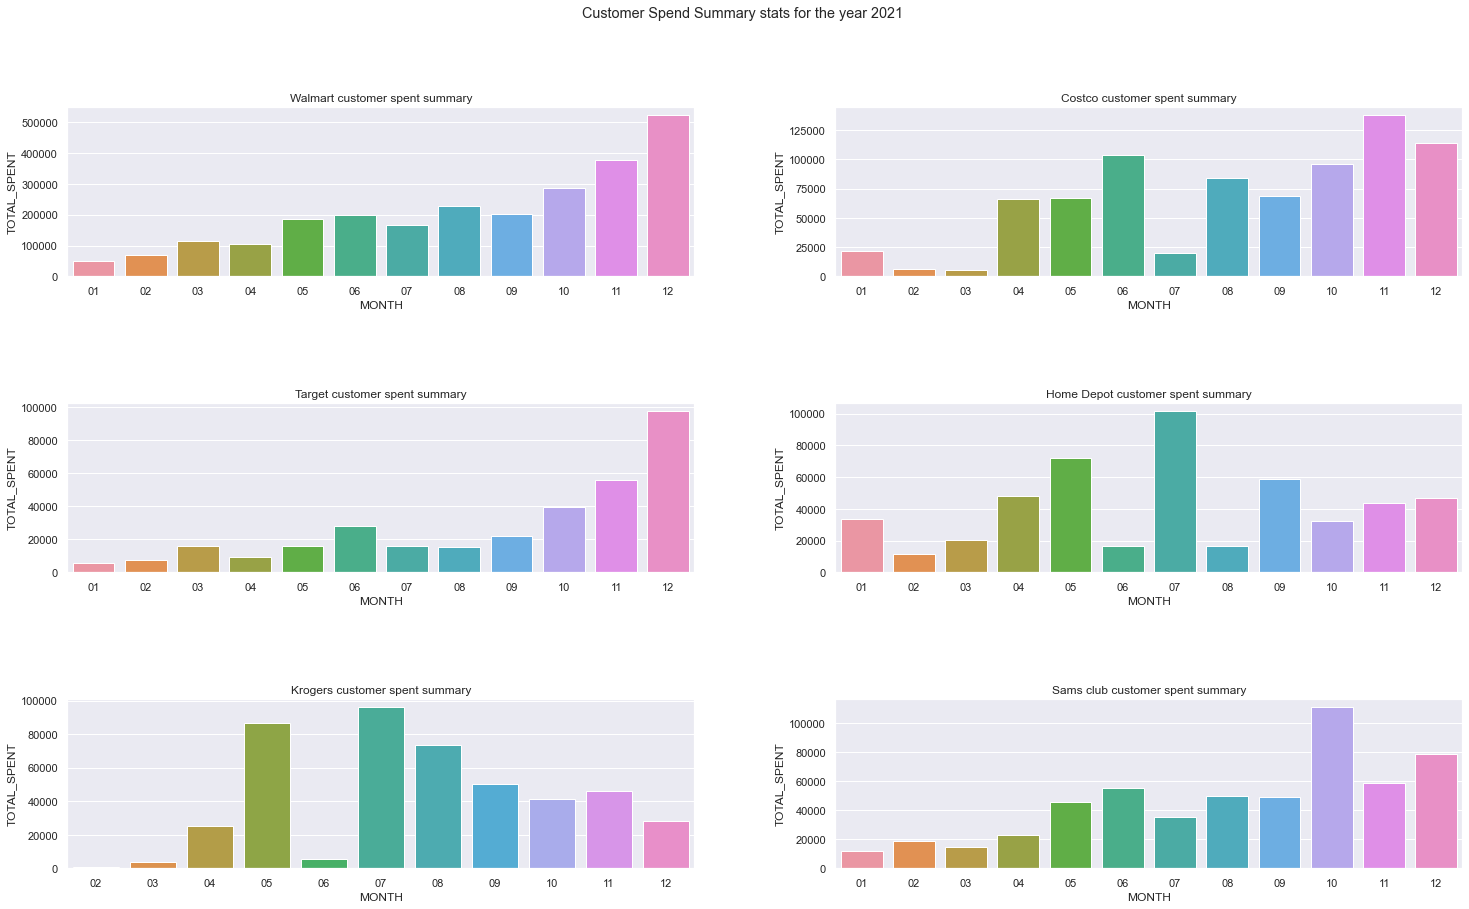

In [18]:
sns.set(rc={'figure.figsize':(25,14)})
fig, axes = plt.subplots(3,2)
fig.suptitle('Customer Spend Summary stats for the year 2021')
fig.subplots_adjust(hspace=0.75, wspace=0.225)
sns.barplot(data=walmart_df_2021, x='MONTH', y= 'TOTAL_SPENT',ax=axes[0,0]).set(title="Walmart customer spent summary")
sns.barplot(data=costco_df_2021, x='MONTH', y= 'TOTAL_SPENT',ax=axes[0,1]).set(title="Costco customer spent summary")
sns.barplot(data=target_df_2021, x='MONTH', y= 'TOTAL_SPENT',ax=axes[1,0]).set(title="Target customer spent summary")
sns.barplot(data=homedepot_df_2021, x='MONTH', y= 'TOTAL_SPENT',ax=axes[1,1]).set(title="Home Depot customer spent summary")
sns.barplot(data=kroger_df_2021, x='MONTH', y= 'TOTAL_SPENT',ax=axes[2,0]).set(title="Krogers customer spent summary")
sns.barplot(data=samsclub_df_2021, x='MONTH', y= 'TOTAL_SPENT',ax=axes[2,1]).set(title="Sams club customer spent summary");

 #### For the year 2021, we can see that the spend summary for walmart has a strong upward trend. Similar is the case for Target. For Krogers, the spend was maximum in the months of July and August, which might be suggestive of some kind of marketing or offer which was successful. Costco sees a general upward trend and so does Sam's club. Home depot also saw maximum sales amount in July which may show Summer buying trends of the customers.

In [19]:
walmart_df_2022 = trend_plot('WALMART', '2022')
costco_df_2022 = trend_plot('COSTCO', '2022')
target_df_2022 =  trend_plot("TARGET", '2022')
homedepot_df_2022 = trend_plot("THE HOME DEPOT", '2022')
kroger_df_2022 = trend_plot("KROGER", '2022')
samsclub_df_2022 = trend_plot("SAM'S CLUB", '2022')

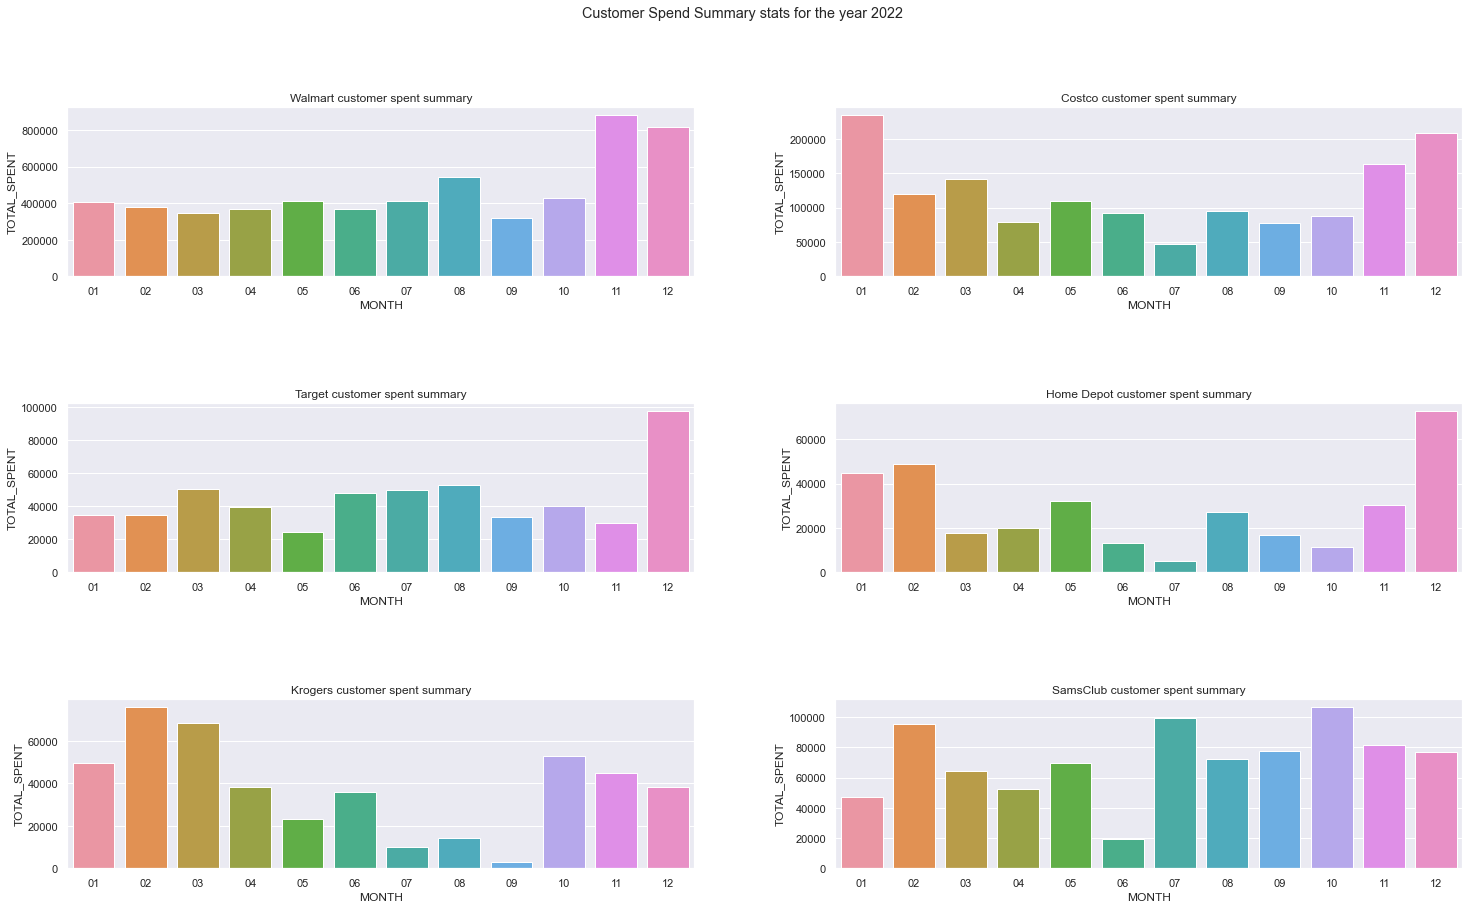

In [20]:
sns.set(rc={'figure.figsize':(25,14)})
fig, axes = plt.subplots(3,2)
fig.suptitle('Customer Spend Summary stats for the year 2022')
fig.subplots_adjust(hspace=0.75, wspace=0.225)
sns.barplot(data=walmart_df_2022, x='MONTH', y= 'TOTAL_SPENT',ax=axes[0,0]).set(title="Walmart customer spent summary")
sns.barplot(data=costco_df_2022, x='MONTH', y= 'TOTAL_SPENT',ax=axes[0,1]).set(title="Costco customer spent summary")
sns.barplot(data=target_df_2022, x='MONTH', y= 'TOTAL_SPENT',ax=axes[1,0]).set(title="Target customer spent summary")
sns.barplot(data=homedepot_df_2022, x='MONTH', y= 'TOTAL_SPENT',ax=axes[1,1]).set(title="Home Depot customer spent summary")
sns.barplot(data=kroger_df_2022, x='MONTH', y= 'TOTAL_SPENT',ax=axes[2,0]).set(title="Krogers customer spent summary")
sns.barplot(data=samsclub_df_2022, x='MONTH', y= 'TOTAL_SPENT',ax=axes[2,1]).set(title="SamsClub customer spent summary");

 #### As compared to 2021, 2022 sees a weak trend in sales prices. Only walmart shows a strong upward growth in the last quarter of the year.